In [45]:
from fitsio import FITS
import fitsio
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import numpy as np
import os

In [47]:
dir_calib = 'Delta_calibration/Log'
dir_calib2 = 'Delta_calibration2/Log'
dir_LYA = 'Delta_LYA/Log'

In [48]:
files_calib = [file for file in os.listdir(dir_calib) if file.startswith('delta_attributes_iteration')]
files_calib2 = [file for file in os.listdir(dir_calib2) if file.startswith('delta_attributes_iteration')]
files_LYA = [file for file in os.listdir(dir_LYA) if file.startswith('delta_attributes_iteration')]

In [78]:
document_1 = FITS(dir_running + '/' + files[0],vstorage='object')

In [79]:
print(document_1,document_1[2],document_1[3])


  file: Delta_calibration/Log/delta_attributes_iteration1.fits.gz
  mode: READONLY
  extnum hdutype         hduname[v] 
  file: Delta_calibration/Log/delta_attributes_iteration1.fits.gz
  extension: 2
  type: BINARY_TBL
  extname: WEIGHT
  rows: 20
  column info:
    loglam              f8  
    eta                 f8  
    var_lss             f8  
    fudge               f8  
    nb_pixels           f8   
  file: Delta_calibration/Log/delta_attributes_iteration1.fits.gz
  extension: 3
  type: BINARY_TBL
  extname: CONT
  rows: 106
  column info:
    loglam_rest         f8  
    mean_cont           f8  
    weight              f8  


In [58]:
eta_calib = []
var_lss_calib = []
fudge_calib = []
mean_cont_calib = []
eta_calib2 = []
var_lss_calib2 = []
fudge_calib2 = []
mean_cont_calib2 = []
eta_LYA = []
var_lss_LYA = []
fudge_LYA = []
mean_cont_LYA = []
for index in range(19):
    document_calib = FITS(dir_calib + '/' + files_calib[index],vstorage='object')
    eta_calib.append(document_calib['WEIGHT']['eta'][:])
    var_lss_calib.append(document_calib['WEIGHT']['var_lss'][:])
    fudge_calib.append(document_calib['WEIGHT']['fudge'][:])
    mean_cont_calib.append(document_calib['CONT']['mean_cont'][:])
    document_calib2 = FITS(dir_calib2 + '/' + files_calib2[index],vstorage='object')
    eta_calib2.append(document_calib2['WEIGHT']['eta'][:])
    var_lss_calib2.append(document_calib2['WEIGHT']['var_lss'][:])
    fudge_calib2.append(document_calib2['WEIGHT']['fudge'][:])
    mean_cont_calib2.append(document_calib2['CONT']['mean_cont'][:])
    document_LYA = FITS(dir_LYA + '/' + files_LYA[index],vstorage='object')
    eta_LYA.append(document_LYA['WEIGHT']['eta'][:])
    var_lss_LYA.append(document_LYA['WEIGHT']['var_lss'][:])
    fudge_LYA.append(document_LYA['WEIGHT']['fudge'][:])
    mean_cont_LYA.append(document_LYA['CONT']['mean_cont'][:])

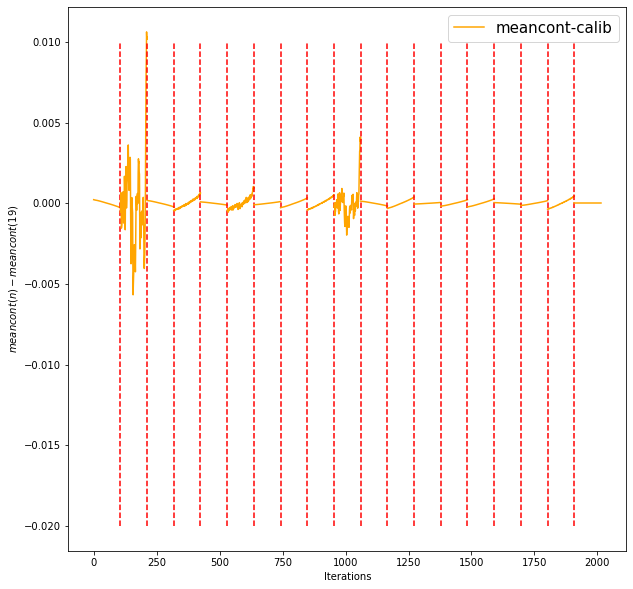

In [104]:
plt.figure(figsize=(10,10))
llen_calib = len(mean_cont_calib[0])
llen_LYA = len(mean_cont_LYA[0])
for num in range(len(eta_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    plt.plot(X_calib,mean_cont_calib[num] - mean_cont_calib[18],color = 'orange')
    #plt.plot(X_calib,mean_cont_calib2[num],color = 'blue')
    #plt.plot(X_LYA,mean_cont_LYA[num] - mean_cont_LYA[0],color = 'black')
    plt.plot([(num+1)*llen_calib]*100,np.linspace(-0.02,0.01,100),color = 'red',linestyle='dashed')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
plt.plot(X_calib,mean_cont_calib[18] - mean_cont_calib[18],color = 'orange',label = 'meancont-calib')
#plt.plot(X_calib,mean_cont_calib2[18],color = 'blue',label = 'meancont-calib2')
#plt.plot(X_LYA,mean_cont_LYA[18] - mean_cont_LYA[0],color = 'black',label = 'meancont-LYA')
plt.xlabel('Iterations')
plt.ylabel(r'$meancont(n)-meancont(19)$')
plt.legend(fontsize = 15)
plt.show()

## Mean_continuum of calib for each iteration (In total 20 iterations). The y axis is Mean_continuum of each iteration substracted by the last iteration

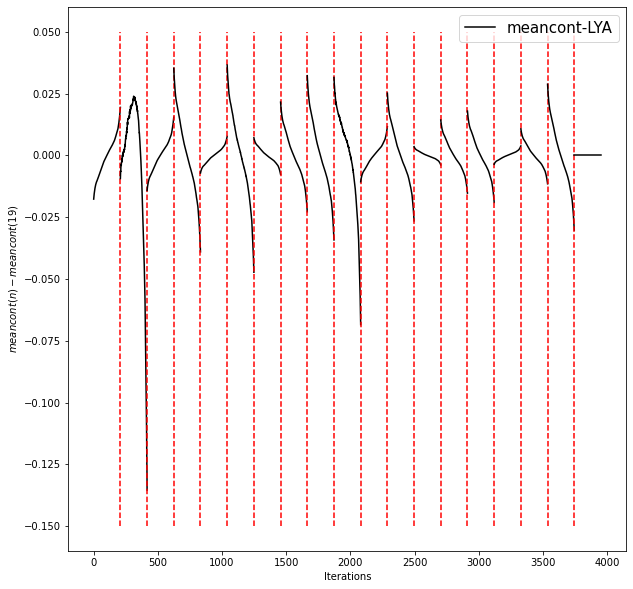

In [105]:
plt.figure(figsize=(10,10))
llen_calib = len(mean_cont_calib[0])
llen_LYA = len(mean_cont_LYA[0])
for num in range(len(eta_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    #plt.plot(X_calib,mean_cont_calib[num],color = 'orange')
    #plt.plot(X_calib,mean_cont_calib2[num],color = 'blue')
    plt.plot(X_LYA,mean_cont_LYA[num] - mean_cont_LYA[18],color = 'black')
    plt.plot([(num+1)*llen_LYA]*100,np.linspace(-0.15,0.05,100),color = 'red',linestyle='dashed')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
#plt.plot(X_calib,mean_cont_calib[18],color = 'orange',label = 'meancont-calib')
#plt.plot(X_calib,mean_cont_calib2[18],color = 'blue',label = 'meancont-calib2')
plt.plot(X_LYA,mean_cont_LYA[18] - mean_cont_LYA[18],color = 'black',label = 'meancont-LYA')
plt.xlabel('Iterations')
plt.ylabel(r'$meancont(n)-meancont(19)$')
plt.legend(fontsize = 15)
plt.show()

## Mean_continuum of LYA for each iteration (In total 20 iterations). The y axis is  Mean_continuum of each iteration substracted by the first iteration

In [100]:
'''
plt.figure(figsize=(10,10))
llen_calib = len(eta_calib[0])
llen_LYA = len(eta_LYA[0])
for num in range(len(eta_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    plt.plot(X_calib,eta_calib[num],color = 'orange')
    plt.plot(X_calib,eta_calib2[num],color = 'blue')
    plt.plot(X_LYA,eta_LYA[num],color = 'black')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
plt.plot(X_calib,eta_calib[18],color = 'orange',label = 'eta-calib')
plt.plot(X_calib,eta_calib2[18],color = 'blue',label = 'eta-calib2')
plt.plot(X_LYA,eta_LYA[18],color = 'black',label = 'eta-LYA')
plt.legend(fontsize = 15)
plt.show()
'''

"\nplt.figure(figsize=(10,10))\nllen_calib = len(eta_calib[0])\nllen_LYA = len(eta_LYA[0])\nfor num in range(len(eta_LYA)-1):\n    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)\n    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)\n    plt.plot(X_calib,eta_calib[num],color = 'orange')\n    plt.plot(X_calib,eta_calib2[num],color = 'blue')\n    plt.plot(X_LYA,eta_LYA[num],color = 'black')\nX_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)\nX_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)\nplt.plot(X_calib,eta_calib[18],color = 'orange',label = 'eta-calib')\nplt.plot(X_calib,eta_calib2[18],color = 'blue',label = 'eta-calib2')\nplt.plot(X_LYA,eta_LYA[18],color = 'black',label = 'eta-LYA')\nplt.legend(fontsize = 15)\nplt.show()\n"

## Eta for the whole calib, calib2 and LYA 

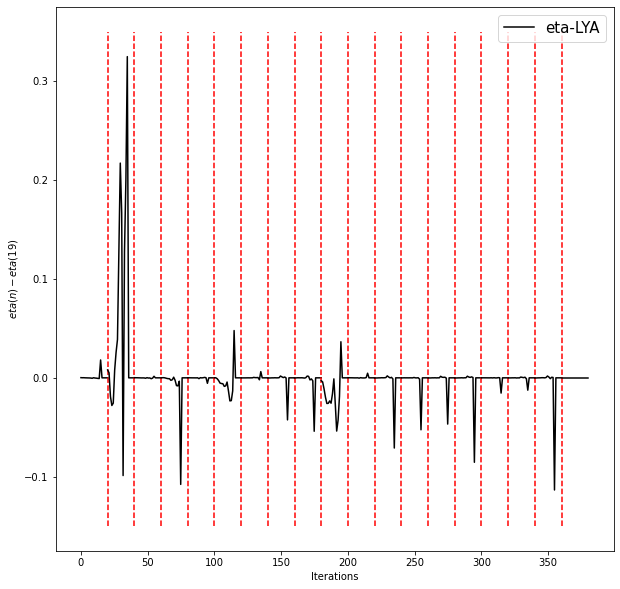

In [106]:
plt.figure(figsize=(10,10))
llen_calib = len(eta_calib[0])
llen_LYA = len(eta_LYA[0])
for num in range(len(eta_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    #plt.plot(X_calib,eta_calib[num],color = 'orange')
    #plt.plot(X_calib,eta_calib2[num],color = 'blue')
    plt.plot(X_LYA,eta_LYA[num] - eta_LYA[18],color = 'black')
    plt.plot([(num+1)*llen_LYA]*100,np.linspace(-0.15,0.35,100),color = 'red',linestyle='dashed')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
#plt.plot(X_calib,eta_calib[18],color = 'orange',label = 'eta-calib')
#plt.plot(X_calib,eta_calib2[18],color = 'blue',label = 'eta-calib2')
plt.plot(X_LYA,eta_LYA[18] - eta_LYA[18],color = 'black',label = 'eta-LYA')
plt.xlabel('Iterations')
plt.ylabel(r'$eta(n)-eta(19)$')
plt.legend(fontsize = 15)
plt.show()

## eta of LYA for each iteration (In total 20 iterations). The y axis is eta of each iteration substracted by the last iteration

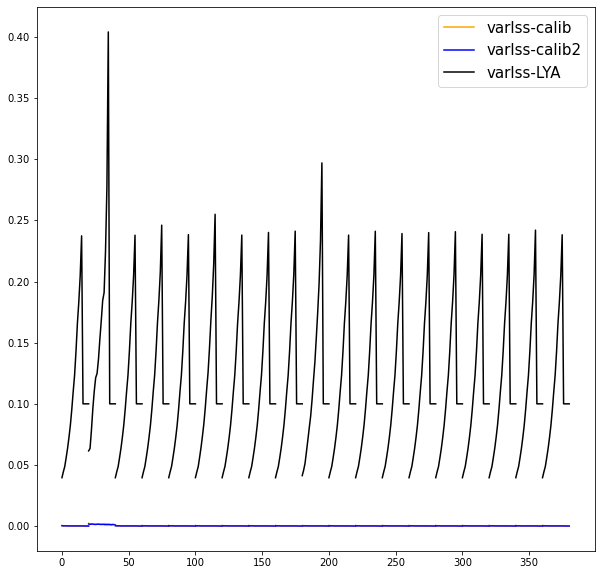

In [69]:
plt.figure(figsize=(10,10))
llen_calib = len(var_lss_calib[0])
llen_LYA = len(var_lss_LYA[0])
for num in range(len(var_lss_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    plt.plot(X_calib,var_lss_calib[num],color = 'orange')
    plt.plot(X_calib,var_lss_calib2[num],color = 'blue')
    plt.plot(X_LYA,var_lss_LYA[num],color = 'black')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
plt.plot(X_calib,var_lss_calib[18],color = 'orange',label = 'varlss-calib')
plt.plot(X_calib,var_lss_calib2[18],color = 'blue',label = 'varlss-calib2')
plt.plot(X_LYA,var_lss_LYA[18],color = 'black',label = 'varlss-LYA')
plt.legend(fontsize = 15)
plt.show()

## varlss for calib, calib2 and LYA

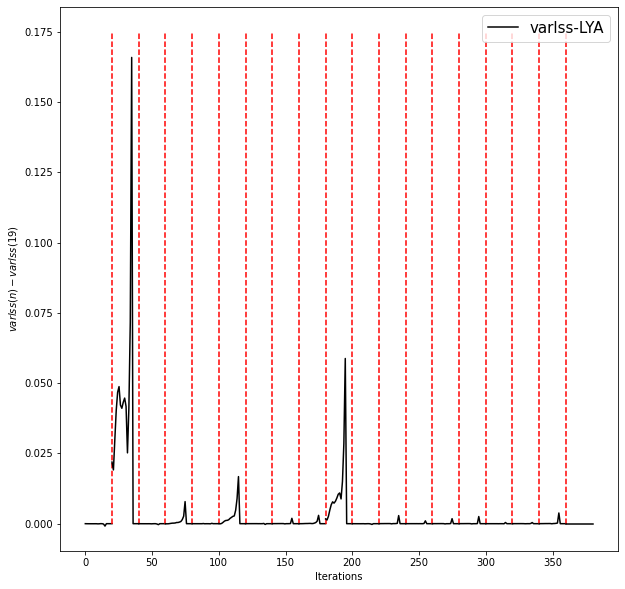

In [107]:
plt.figure(figsize=(10,10))
llen_calib = len(var_lss_calib[0])
llen_LYA = len(var_lss_LYA[0])
for num in range(len(var_lss_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    plt.plot(X_LYA,var_lss_LYA[num] - var_lss_LYA[18],color = 'black')
    plt.plot([(num+1)*llen_LYA]*100,np.linspace(0,0.175,100),color = 'red',linestyle='dashed')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
plt.plot(X_LYA,var_lss_LYA[18] - var_lss_LYA[18],color = 'black',label = 'varlss-LYA')
plt.xlabel('Iterations')
plt.ylabel(r'$varlss(n)-varlss(19)$')
plt.legend(fontsize = 15)
plt.show()

## varlss of LYA for each iteration (In total 20 iterations). The y axis is varlss of each iteration substracted by the last iteration

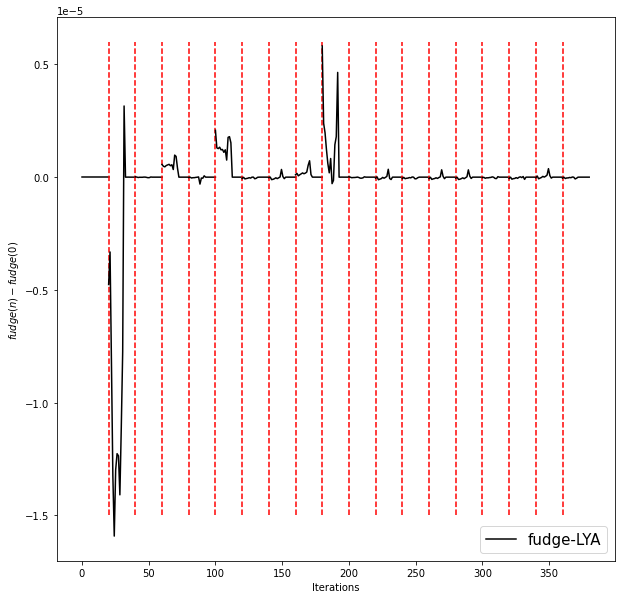

In [96]:
plt.figure(figsize=(10,10))
llen_calib = len(fudge_calib[0])
llen_LYA = len(fudge_LYA[0])
for num in range(len(fudge_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    plt.plot(X_LYA,fudge_LYA[num] - fudge_LYA[0],color = 'black')
    plt.plot([(num+1)*llen_LYA]*100,np.linspace(-1.5*1e-5,0.6*1e-5,100),color = 'red',linestyle='dashed')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
plt.plot(X_LYA,fudge_LYA[18] - fudge_LYA[0],color = 'black',label = 'fudge-LYA')
plt.xlabel('Iterations')
plt.ylabel(r'$fudge(n)-fudge(0)$')
plt.legend(fontsize = 15)
plt.show()

## fudge of LYA for each iteration (In total 20 iterations). The y axis is fudge of each iteration substracted by the first iteration

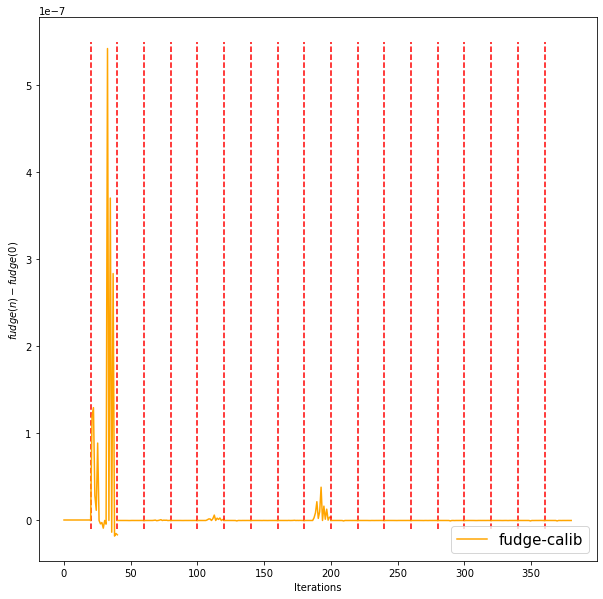

In [98]:
plt.figure(figsize=(10,10))
llen_calib = len(fudge_calib[0])
llen_LYA = len(fudge_LYA[0])
for num in range(len(fudge_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    plt.plot(X_calib,fudge_calib[num] - fudge_calib[0],color = 'orange')
    plt.plot([(num+1)*llen_LYA]*100,np.linspace(-0.1*1e-7,5.5*1e-7,100),color = 'red',linestyle='dashed')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
plt.plot(X_calib,fudge_calib[18] - fudge_calib[0],color = 'orange',label = 'fudge-calib')
plt.xlabel('Iterations')
plt.ylabel(r'$fudge(n)-fudge(0)$')
plt.legend(fontsize = 15)
plt.show()

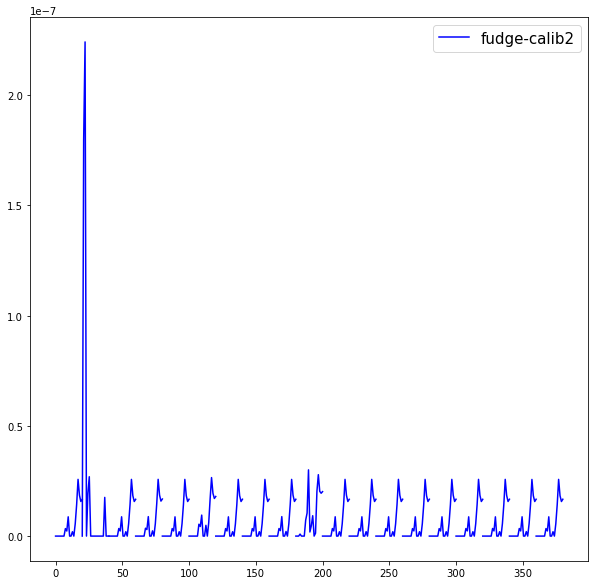

In [74]:
plt.figure(figsize=(10,10))
llen_calib = len(fudge_calib[0])
llen_LYA = len(fudge_LYA[0])
for num in range(len(fudge_LYA)-1):
    X_calib = np.linspace(num*llen_calib, (num+1)*llen_calib,llen_calib)
    X_LYA = np.linspace(num*llen_LYA, (num+1)*llen_LYA,llen_LYA)
    #plt.plot(X_calib,fudge_calib[num],color = 'orange')
    plt.plot(X_calib,fudge_calib2[num],color = 'blue')
    #plt.plot(X_LYA,fudge_LYA[num],color = 'black')
X_calib = np.linspace(18*llen_calib, (18+1)*llen_calib,llen_calib)
X_LYA = np.linspace(18*llen_LYA, (18+1)*llen_LYA,llen_LYA)
#plt.plot(X_calib,fudge_calib[18],color = 'orange',label = 'fudge-calib')
plt.plot(X_calib,fudge_calib2[18],color = 'blue',label = 'fudge-calib2')
#plt.plot(X_LYA,fudge_LYA[18],color = 'black',label = 'fudge-LYA')
plt.legend(fontsize = 15)
plt.show()